In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import IncrementalPCA
from adjustText import adjust_text
from vapeplot import vapeplot
%matplotlib inline

#### Load in the FIFA18 dataset (from local directory) and have a quick look at it's structure:

#### The data used here is freely downloadable from Kaggle: <i>(it's almost 2mb in size so I won't upload here)</i>
https://www.kaggle.com/thec03u5/fifa-18-demo-player-dataset/data

In [2]:
df = pd.read_csv('data/CompleteDataset.csv', index_col=0)

/Applications/anaconda/envs/py3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Examine and clean the data:

In [3]:
df.shape

(17981, 74)

In [4]:
df.columns

Index(['Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall', 'Potential',
       'Club', 'Club Logo', 'Value', 'Wage', 'Special', 'Acceleration',
       'Aggression', 'Agility', 'Balance', 'Ball control', 'Composure',
       'Crossing', 'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy',
       'GK diving', 'GK handling', 'GK kicking', 'GK positioning',
       'GK reflexes', 'Heading accuracy', 'Interceptions', 'Jumping',
       'Long passing', 'Long shots', 'Marking', 'Penalties', 'Positioning',
       'Reactions', 'Short passing', 'Shot power', 'Sliding tackle',
       'Sprint speed', 'Stamina', 'Standing tackle', 'Strength', 'Vision',
       'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID', 'LAM', 'LB', 'LCB',
       'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'Preferred Positions',
       'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

In [5]:
df.describe()

,Age,Overall,Potential,Special,CAM,CB,CDM,CF,CM,ID,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
count,17981.000000,17981.000000,17981.000000,17981.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,17981.000000,...,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000
mean,25.144541,66.247984,71.190813,1594.095100,59.251755,55.550464,56.865283,59.030028,58.506833,207658.710138,...,56.979689,55.550464,58.506833,56.865283,59.030028,60.057736,58.204050,59.359265,57.698721,58.204050
std,4.614272,6.987965,6.102199,272.151435,9.880164,12.192579,10.310178,9.926988,8.888040,32291.667313,...,9.791627,12.192579,8.888040,10.310178,9.926988,9.349180,9.181392,9.978084,9.142825,9.181392
min,16.000000,46.000000,46.000000,728.000000,27.000000,25.000000,26.000000,27.000000,30.000000,16.000000,...,30.000000,25.000000,30.000000,26.000000,27.000000,28.000000,31.000000,26.000000,31.000000,31.000000
25%,21.000000,62.000000,67.000000,1449.000000,53.000000,45.000000,49.000000,53.000000,53.000000,192622.000000,...,50.000000,45.000000,53.000000,49.000000,53.000000,54.000000,52.000000,53.000000,51.000000,52.000000
50%,25.000000,66.000000,71.000000,1633.000000,60.000000,57.000000,58.000000,60.000000,59.000000,214057.000000,...,58.000000,57.000000,59.000000,58.000000,60.000000,61.000000,59.000000,60.000000,58.000000,59.000000
75%,28.000000,71.000000,75.000000,1786.000000,66.000000,65.000000,65.000000,66.000000,65.000000,231448.000000,...,64.000000,65.000000,65.000000,65.000000,66.000000,67.000000,65.000000,66.000000,64.000000,65.000000
max,47.000000,94.000000,94.000000,2291.000000,92.000000,87.000000,85.000000,92.000000,87.000000,241219.000000,...,84.000000,87.000000,87.000000,85.000000,92.000000,90.000000,92.000000,91.000000,84.000000,92.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17981 entries, 0 to 17980
Data columns (total 74 columns):
Name                   17981 non-null object
Age                    17981 non-null int64
Photo                  17981 non-null object
Nationality            17981 non-null object
Flag                   17981 non-null object
Overall                17981 non-null int64
Potential              17981 non-null int64
Club                   17733 non-null object
Club Logo              17981 non-null object
Value                  17981 non-null object
Wage                   17981 non-null object
Special                17981 non-null int64
Acceleration           17981 non-null object
Aggression             17981 non-null object
Agility                17981 non-null object
Balance                17981 non-null object
Ball control           17981 non-null object
Composure              17981 non-null object
Crossing               17981 non-null object
Curve                  17981 non-null ob

### So would expect stat columns: Acceleration -> Volleys to be floats or integers ...let's see whats going on...

In [7]:
df['Free kick accuracy'].unique()

array(['76', '90', '84', '11', '19', '79', '62', '67', '83', '78', '77',
       '85', '72', '31', '13', '14', '75', '74', '61', '51', '53', '10',
       '82', '81', '49', '64', '87', '68', '43', '70', '66', '86', '59',
       '69', '45', '35', '39', '73', '47', '54', '71', '15', '8', '12',
       '26', '58', '91', '52', '63', '44', '28', '65', '57', '22', '27',
       '20', '30', '60', '56', '32', '50', '16', '42', '33', '89', '55',
       '37', '80', '48', '46', '38', '23', '36', '81+1', '18', '17', '25',
       '34', '40', '66-5', '24', '93', '73+1', '29', '88', '41', '21',
       '57+5', '60-4', '56+4', '7', '9', '60+8', '53+11', '63-7', '77-3',
       '4', '58+2', '69+1', '52+10', '62-3', '69-2', '65+1', '70+5',
       '39+2', '6', '58+6', '62-4', '65+5', '61+10', '71+4', '56+11',
       '64+1', '39+10', '55+21', '64+8', '70+3', '68+4', '70+17', '69+12',
       '65+24', '52+9', '70+21', '39-9', '66+30', '64-3', '70+4', '67-1',
       '39-6', '65+29', '56-2', '64-2', '36+4', '53+1',

#### Need to convert these values to an int, not a string. E.g. '79+1' should be 80 of type int

In [8]:
fix_cols = ['Acceleration','Aggression', 'Agility', 'Balance', 'Ball control', 'Composure',
    'Crossing', 'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy',
    'GK diving', 'GK handling', 'GK kicking', 'GK positioning',
    'GK reflexes', 'Heading accuracy', 'Interceptions', 'Jumping',
    'Long passing', 'Long shots', 'Marking', 'Penalties', 'Positioning',
    'Reactions', 'Short passing', 'Shot power', 'Sliding tackle',
    'Sprint speed', 'Stamina', 'Standing tackle', 'Strength', 'Vision',
    'Volleys']

In [9]:
for col in fix_cols:
    
    df[col] = df[col].apply(lambda x : eval(str(x)))  # converts string to int, applying any numerical operation

## 1. K-Means clustering for two premier league teams

#### Ok great, now all the data is in order and ready to do some interesting stuff

#### For the first bit of analysis, I'll look at comparing the playing attributes of players from two different clubs. This is to explore the types of players each team have and to see (if any) of the players from opposing teams have a similar skillset to each other.

#### I will do this by performing K-means clustering on the players skillset. The skillset will be normalised for overall ability, so that clusters of players aren't based simply on if they're good or not. The focus is on the type of player they are.

#### I'll look at comparing players from the team I support, Newcastle United, with those from Manchester United...

In [10]:
dfnm = df[(df.Club =='Newcastle United')| (df.Club=='Manchester United')]

In [11]:
dfnm = dfnm.drop_duplicates(subset=['Name'])

Use for labels later:

In [12]:
names = dfnm['Name'].tolist()

In [13]:
dfnm[:3]

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
6,De Gea,26,https://cdn.sofifa.org/48/18/players/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,90,92,Manchester United,https://cdn.sofifa.org/24/18/teams/11.png,€64.5M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,Z. Ibrahimović,35,https://cdn.sofifa.org/48/18/players/41236.png,Sweden,https://cdn.sofifa.org/flags/46.png,88,88,Manchester United,https://cdn.sofifa.org/24/18/teams/11.png,€27M,...,54.0,52.0,78.0,60.0,83.0,80.0,84.0,82.0,58.0,84.0
35,P. Pogba,24,https://cdn.sofifa.org/48/18/players/195864.png,France,https://cdn.sofifa.org/flags/18.png,87,92,Manchester United,https://cdn.sofifa.org/24/18/teams/11.png,€66.5M,...,75.0,74.0,84.0,79.0,83.0,83.0,81.0,82.0,77.0,81.0


#### To even out quality of the team, purely to look at the type of player - group-by club and then normalise:

In [14]:
dfnm = dfnm.groupby('Club').transform(lambda x: (x - x.mean()) / x.std())

In [15]:
dfnm[:3]

,Age,Overall,Potential,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
6,0.278055,1.543553,1.883761,-1.517049,-0.984549,-1.564970,-0.563488,-1.446130,-1.920527,-0.665941,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,2.113218,1.292631,1.014333,0.737102,-0.525865,0.951581,0.910086,-1.576164,1.132206,1.660936,...,-1.162877,-0.924539,0.962940,-0.674373,1.428665,1.126116,1.701507,1.34647,-0.988179,1.701507
35,-0.129759,1.167170,1.883761,1.332607,0.162161,0.459213,0.559235,-0.275829,1.198570,1.143852,...,0.730178,0.612478,1.688166,1.011559,1.428665,1.498728,1.362711,1.34647,0.908326,1.362711


In [17]:
dfnm = dfnm.fillna(dfnm.mean())

#### standardise the data with minmaxscaler preprocessing: max value of 1, min of 0 -> important for effective K-means clustering. 
[All the data is numeric from the act of taking the mean]

In [18]:
from sklearn import preprocessing

In [19]:
x = dfnm.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()  # could also test using the StandardScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

#### We need to reduce all the 65 dimensions of the X_norm dataframe into 2, so will use PCA to do this.
#### This essentially turns a set of correlated features into a set of linearly uncorrelated ones, capturing the greatest variablity between features. Of course now, the 2 PCA dimensions on their own are fairly meaningless

In [20]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))

#### One major factor to consider in K-means clustering is the number of clusters the final grouping should have. One method to determine this is via the 'elbow method'. Essentially plotting number of clusters against the sum of squared errors. A good number of clusters to choose is at the plot's "elbow" - the point where adding another cluster doesn't reduce the sum of squared errors too much. It gives a fairly good approximation but is not foolproof, so knowledge of the data helps with this too.

In [21]:
cluster_range = range( 1, 11 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( transformed )
  cluster_errors.append( clusters.inertia_ )

In [22]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [23]:
clusters_df

,cluster_errors,num_clusters
0,181.027737,1
1,96.098605,2
2,51.274874,3
3,31.774081,4
4,21.385120,5
5,17.509442,6
6,15.380483,7
7,12.723111,8
8,10.783284,9
9,9.654689,10


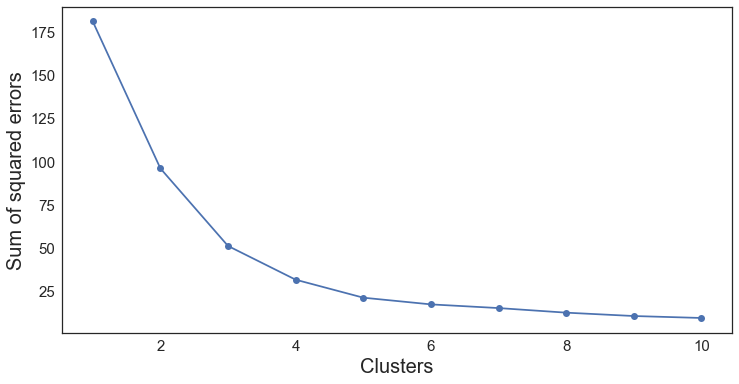

In [24]:
sns.set(style="white")
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.tick_params(labelsize=15)

plt.xlabel("Clusters", fontsize=20)
plt.ylabel("Sum of squared errors", fontsize=20)

#### Examining the "elbow" and after a few few trial-and-error runs, 5 clusters should be appropriate
#### Perform K-means clustering on the PCA reduced dataframe, with 5 clusters:

In [25]:
# Number of clusters
kmeans = KMeans(n_clusters=5)
# Fitting the input data
kmeans = kmeans.fit(transformed)
# Getting the cluster labels
labels = kmeans.predict(transformed)
# Centroid values
C = kmeans.cluster_centers_
clusters = kmeans.labels_.tolist()

#### add the calculated cluster and player names back to the transformed PCA dataframe:

In [26]:
transformed['cluster'] = clusters

In [27]:
transformed['name'] = names

In [28]:
transformed.columns = ['x','y','cluster','name']

In [29]:
transformed[:3]

,x,y,cluster,name
0,1.660474,0.472169,1,De Gea
1,-1.484358,1.573602,0,Z. Ibrahimović
2,-2.194381,-0.083628,4,P. Pogba


#### Now, I'm ready to plot the results - PCA values for the x and y axes, colouring by cluster and adding player name tags as Labels:

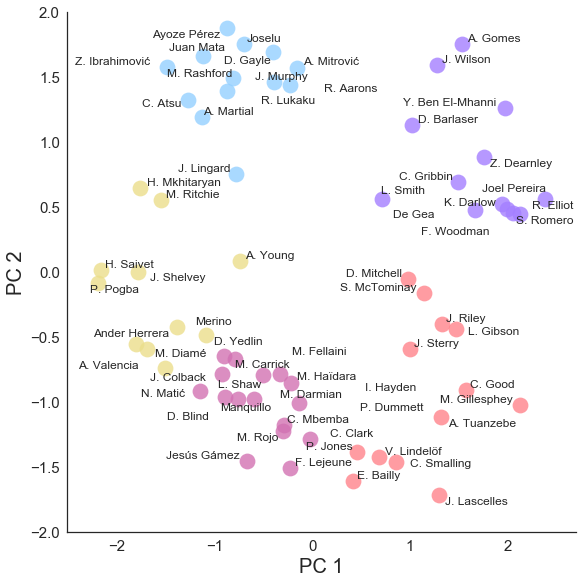

In [30]:
sns.set(style="white")
pal =  sns.blend_palette(vapeplot.palette('vaporwave'))

ax = sns.lmplot(x="x", y="y",hue='cluster', data=transformed, legend=False,
                   fit_reg=False, size =8, scatter_kws={"s": 250}, palette=pal)

texts = []
for x, y, s in zip(transformed.x, transformed.y, transformed.name):
    texts.append(plt.text(x, y, s))
adjust_text(texts) #, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))  # uncomment to add arrows to labels

#ax._legend.set_title(prop={fontsize:'15'})
ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
#plt.setp(ax.get_legend().get_title(), fontsize='15')
plt.xlabel("PC 1", fontsize=20)
plt.ylabel("PC 2", fontsize=20)

plt.show()
# ax.savefig("newc_man_kmeans.jpg")

#### What is instantly recognisable is how well the K-means clustering algorithm has grouped type of players - Defenders in red (cluster 2), defensive midfielders and more defenders in yellow (cluster 4), goalkeepers in green (1), more attacking midfielders in blue (0), and strikers in purple (3). Mkhitaryan, Ritchie, Lingard and Young, all occupy a bit of a no-mans land, however it appears Ritchie and Mkhitaryan have a similar skillset. Also, the algorith suggests that our answers to Paul Pogba are Henri Saivet and Jonjo Shelvey...

## 2. Wing-Back Analysis -> More K-Means Clustering

I've been watching football matches with varying levels of attentiveness* for near enough 20 years.

One of the major changes I've noticed over this time is how teams formations has eveloved over the years.
Say 10 years ago, 4-4-2 was the de-facto norm. This was the formation I used to line up in for my youth teams and was also mirrored for the proffesional, premier league teams too.

Fast-forward to the present day and there's been a shift. If you look at the present line-ups for the top premier league teams: Manchester City, Chelsea, Manchester United, Tottenham, and Arsenal etc etc, they all have have a new go-to formation. A lot more emphasis is on something like a 3-2-3-2. One of the key changes in this line-up is playing a back 3, with free-roaming attacking wing-backs. 

Of course, wingbacks have always been a part of the game, but now, in my opinion, they play a much bigger role in the modern game. You only have to look to the likes of Marcos Alonso at Chelsea - having scroed 6 goals in 23 games this premier league season. Not bad for a defender. Other examples include: Kyle Walker at Spurs, Bellerin at Arsenal, Valencia at United. 

Due to this new proliferation of wing-backs in the Premier League, I decided to do some analysis. 

EA sports' Fifa has one of the most comprehensive player databases available. Stats and ratings for their various positions, skill attributes, transfer cost, wage, Age etc etc. All this data is available from Kaggle - and this forms the basis for my insight.

<i>*I'm a Newcastle Fan, so games have been hard to watch sometimes...</i>

#### Below I will follow much the same template as above, but this time with a different set of players...

##### Select all full-backs/ wing-backs (left and right), remove potential CB's
Unfortunately, there's no "league" column in the dataset, so have to filter by individual teams instead : /

In [31]:
prem = ['Arsenal','Bournemouth', 'Brighton & Hove Albion', 'Burnley', 'Chelsea','Crystal Palace','Everton',
       'Huddersfield Town', 'Leicester City', 'Liverpool', 'Manchester City', 'Manchester United', 'Newcastle United',
       'Southampton','Stoke City', 'Swansea City', 'Tottenham Hotspur','Watford','West Bromwich Albion',
        'West Ham United']

In [32]:
wb = df.loc[(df['Preferred Positions'].str.contains('WB|RB|LB')==True)&(df.Club.isin(prem))
           & (df.Overall > 70)]

Will use this to label the plot later...

In [33]:
names = wb['Name'].tolist()
clubs = wb['Club'].tolist()
pp = wb['Preferred Positions'].tolist()
over = wb['Overall'].tolist()

In [34]:
len(wb)

98

#### Right so, we have 98 players that satisfy the above filter conditions.

#### Next, we need to normalise the players statistics by the club they play for. This is so the players overall ability will not effect the clustering - it will be simply be based upon their own relative attributes.

In [35]:
wb = wb.groupby('Club').transform(lambda x: (x - x.mean()) / x.std())

In [36]:
wb2 = wb._get_numeric_data()

In [37]:
wb2 = wb2.fillna(wb2.mean())

In [38]:
wb2.columns

Index(['Age', 'Overall', 'Potential', 'Special', 'Acceleration', 'Aggression',
       'Agility', 'Balance', 'Ball control', 'Composure', 'Crossing', 'Curve',
       'Dribbling', 'Finishing', 'Free kick accuracy', 'GK diving',
       'GK handling', 'GK kicking', 'GK positioning', 'GK reflexes',
       'Heading accuracy', 'Interceptions', 'Jumping', 'Long passing',
       'Long shots', 'Marking', 'Penalties', 'Positioning', 'Reactions',
       'Short passing', 'Shot power', 'Sliding tackle', 'Sprint speed',
       'Stamina', 'Standing tackle', 'Strength', 'Vision', 'Volleys', 'CAM',
       'CB', 'CDM', 'CF', 'CM', 'ID', 'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF',
       'LM', 'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

In [39]:
#wb_norm= (wb2 - wb2.min())/(wb2.max() - wb2.min())

In [40]:
#wb_norm = wb_norm[['Acceleration','Agility','Crossing','Dribbling','Finishing','Sprint speed',
#       'Stamina']]

In [41]:
x = wb2.values #returns a numpy array
min_max_scaler = preprocessing.StandardScaler()  # could also test using the StandardScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

In [42]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
wb_trans = pd.DataFrame(pca.fit_transform(X_norm))

In [43]:
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( wb_trans )
  cluster_errors.append( clusters.inertia_ )

In [44]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

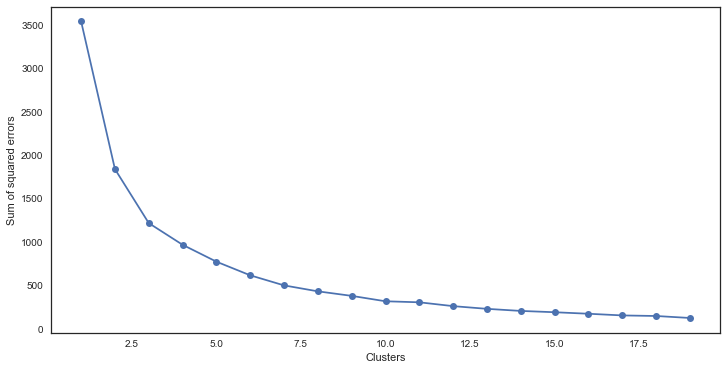

In [45]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.xlabel("Clusters")
plt.ylabel("Sum of squared errors")

#### plot suggests somewhere in the region of 4-6 clusters. After some trial and error, 6 seems to give best fit, without overfitting.

In [46]:
# Number of clusters
kmeans = KMeans(n_clusters=6)
# Fitting the input data
kmeans = kmeans.fit(wb_trans)
# Getting the cluster labels
labels = kmeans.predict(wb_trans)
# Centroid values
C = kmeans.cluster_centers_
clusters = kmeans.labels_.tolist()

In [47]:
C

array([[-2.62417659,  8.26819316],
       [ 1.4222268 , -3.80703841],
       [-4.72990929,  1.88717183],
       [ 7.27515331,  1.0163055 ],
       [ 1.72751159,  1.39900886],
       [-4.46695416, -3.10327227]])

In [48]:
wb_trans['cluster'] = clusters
wb_trans['name'] = names

In [49]:
wb.columns

Index(['Age', 'Overall', 'Potential', 'Special', 'Acceleration', 'Aggression',
       'Agility', 'Balance', 'Ball control', 'Composure', 'Crossing', 'Curve',
       'Dribbling', 'Finishing', 'Free kick accuracy', 'GK diving',
       'GK handling', 'GK kicking', 'GK positioning', 'GK reflexes',
       'Heading accuracy', 'Interceptions', 'Jumping', 'Long passing',
       'Long shots', 'Marking', 'Penalties', 'Positioning', 'Reactions',
       'Short passing', 'Shot power', 'Sliding tackle', 'Sprint speed',
       'Stamina', 'Standing tackle', 'Strength', 'Vision', 'Volleys', 'CAM',
       'CB', 'CDM', 'CF', 'CM', 'ID', 'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF',
       'LM', 'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

In [50]:
wb_trans['club'] = clubs
wb_trans['pp'] = pp
wb_trans['over'] = over

In [51]:
wb_trans.columns = ['x','y','cluster','name','club','pp','over']

In [52]:
wb_trans['comb'] = wb_trans['name'] + ', ' + wb_trans['club'] + ', '+ wb_trans['pp'] + ', ' +  wb_trans['over'].astype(str)

In [53]:
wb_trans[:3]

,x,y,cluster,name,club,pp,over,comb
0,-2.565811,-5.961248,5,Azpilicueta,Chelsea,LB RB CB,85,"Azpilicueta, Chelsea, LB RB CB , 85"
1,-2.092654,-4.946455,5,K. Walker,Manchester City,RWB RB,83,"K. Walker, Manchester City, RWB RB , 83"
2,-8.089171,-2.980874,5,A. Valencia,Manchester United,RB,83,"A. Valencia, Manchester United, RB , 83"


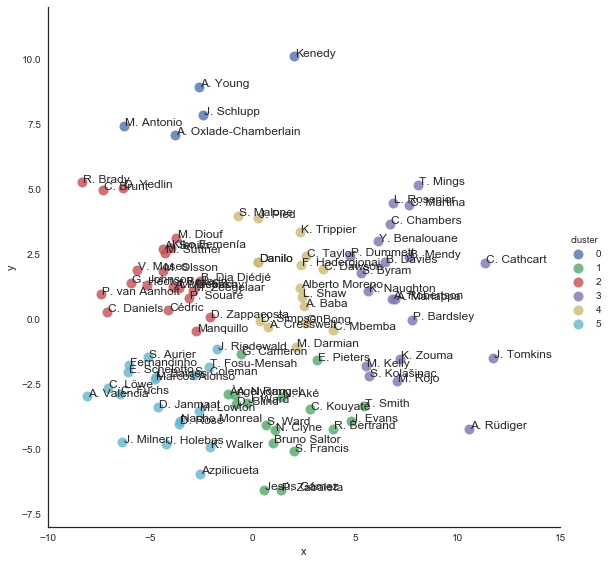

In [54]:
ax = sns.lmplot(x="x", y="y",hue='cluster', data=wb_trans, fit_reg=False, size =8, scatter_kws={"s": 100})

ax.set(xlim=(-10, 15))
ax.set(ylim=(-8, 12))


def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.05, point['y'], str(point['val']))

label_point(wb_trans.x, wb_trans.y, wb_trans.name, plt.gca())

sns.plt.show()

#### NICE! but a lot of labels overlapping and looks a bit messy -> use hover-over of the mpld3 library:

In [55]:
import mpld3

/Applications/anaconda/envs/py3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


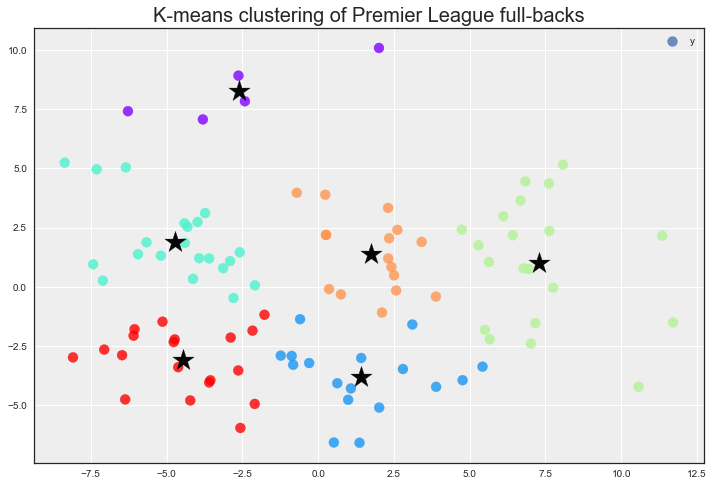

In [56]:
fig, ax = plt.subplots(subplot_kw=dict(axisbg='#EEEEEE'), figsize=(12,8))

scatter = ax.scatter(wb_trans.x,
                     wb_trans.y,
                     c=wb_trans.cluster,
                     alpha=0.8,
                     s=100,
                     cmap=plt.cm.rainbow)

ax.scatter(C[:, 0], C[:, 1], marker='*', c='#050505', s=500)

ax.grid(color='white', linestyle='solid')

ax.set_title("K-means clustering of Premier League full-backs", size=20)
ax.legend(fancybox=True)

labels = wb_trans.comb.tolist()
clusters = wb_trans.cluster.unique().tolist()
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
mpld3.plugins.connect(fig, tooltip)


#mpld3.save_html(fig,"fifa_scatter_clusters.html")  # uncomment to save locally
mpld3.enable_notebook()

#### So in this case, Cluster 0 (on the whole) represents the more attack-minded players - based on my own knowledge of the players and the dataset. For example; Kyle Walker, Antonio Valencia, Leighton Baines, Seamus Coleman, Marcos Alonso are all in here. There are other players which I would also, personally, classify as having similar attributes but have been placed in other clusters. This could be due to the PCA dimensionaility reduction biasing for some factors over others, or even my own oppinion being biased. However, on the whole this, to me, looks like a simialar group of players. Great, it works! 

#### One potential use for this would be during a transfer period, when a club is looking to fill the space of an outgoing player with somebody who has similar attributes.

In [63]:
wb_trans[(wb_trans.cluster==5)][:8]

,x,y,cluster,name,club,pp,over,comb
0,-2.565811,-5.961248,5,Azpilicueta,Chelsea,LB RB CB,85,"Azpilicueta, Chelsea, LB RB CB , 85"
1,-2.092654,-4.946455,5,K. Walker,Manchester City,RWB RB,83,"K. Walker, Manchester City, RWB RB , 83"
2,-8.089171,-2.980874,5,A. Valencia,Manchester United,RB,83,"A. Valencia, Manchester United, RB , 83"
6,-3.596171,-4.040012,5,D. Rose,Tottenham Hotspur,LWB LB,82,"D. Rose, Tottenham Hotspur, LWB LB , 82"
7,-4.730539,-2.221499,5,L. Baines,Everton,LB,82,"L. Baines, Everton, LB , 82"
8,-6.057624,-1.790500,5,Fernandinho,Manchester City,RB CM CDM,82,"Fernandinho, Manchester City, RB CM CDM , 82"
10,-5.135062,-1.472769,5,S. Aurier,Tottenham Hotspur,RB,81,"S. Aurier, Tottenham Hotspur, RB , 81"
11,-4.767347,-2.334039,5,Marcos Alonso,Chelsea,LB LM LWB,81,"Marcos Alonso, Chelsea, LB LM LWB , 81"


#### Check how many players from different clubs are represented in this cluster:

In [64]:
wb_trans[(wb_trans.cluster==5)].club.value_counts()

Manchester City           2
Crystal Palace            2
Tottenham Hotspur         2
Chelsea                   2
Everton                   2
Watford                   2
Arsenal                   1
Leicester City            1
Burnley                   1
Brighton & Hove Albion    1
Liverpool                 1
Manchester United         1
Huddersfield Town         1
Name: club, dtype: int64

#### So there we have it. Most of the teams with 2 players in this 'attacking' cluster are certainly top 10 teams - Chelsea, Manchester United, Spurs, and Manchester City all have 2 representitives. This is interesting, as this confirms my intial thoughts about top teams opting for a formation which favours the play of attacking wingbacks.